In [3]:

%matplotlib inline
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import pickle as pkl
import networkx as nx

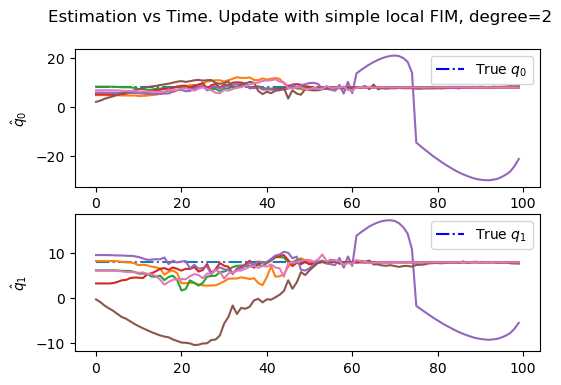

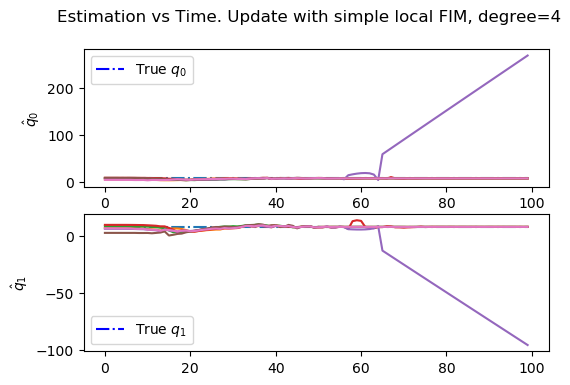

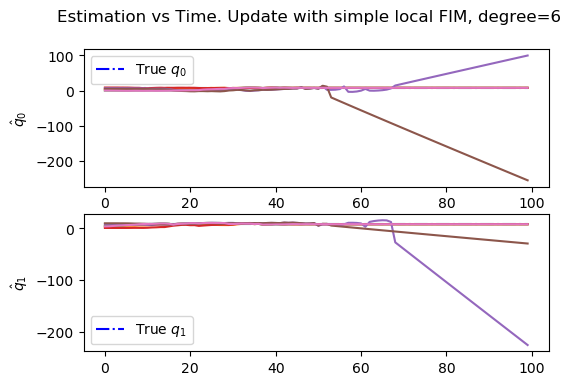

In [14]:
from matplotlib.lines import Line2D

for in_deg in [1,2,3]:
    expr= "P2P-U{}".format(in_deg)
    filepath = "{}.pkl".format(expr)
    with open(filepath,'rb') as file:
        record = pkl.load(file)

    title=r"Update with simple local FIM, degree={}".format(in_deg*2)

    qs = record['src_locs']['source_1']

    fig, ax = plt.subplots(2,dpi=100)

    fig.suptitle('Estimation vs Time. Update with simple local FIM, degree={}'.format(in_deg*2))
    for _ in range(2):
        ax[_].plot(qs[:,_],'-.')
        custom_lines = [Line2D([0], [0], color='blue', ls='-.'),]
        ax[_].legend(custom_lines, ['True $q_{}$'.format(_)])
        for name,est in record['est_locs_log'].items():
            ax[_].plot(est[:,_])
            ax[_].set_ylabel(r'$\hat q_{}$'.format(_))



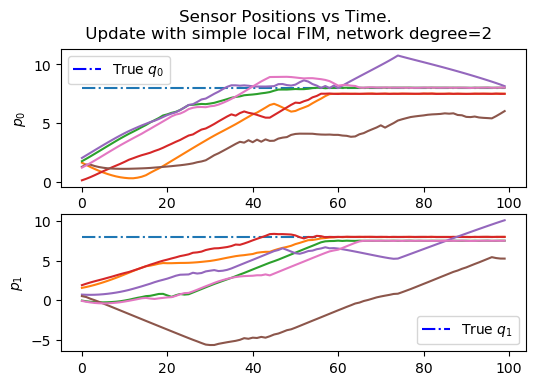

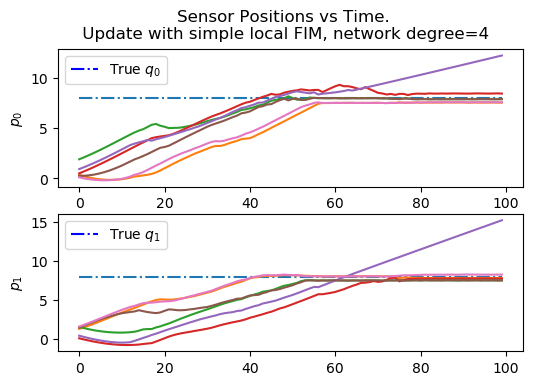

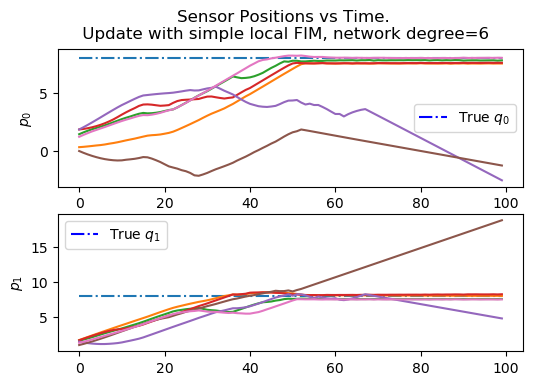

In [23]:
for in_deg in [1,2,3]:
    expr= "P2P-U{}".format(in_deg)
    filepath = "{}.pkl".format(expr)
    with open(filepath,'rb') as file:
        record = pkl.load(file)

    qs = record['src_locs']['source_1']
    ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])


    fig, ax = plt.subplots(2,dpi=100)

    fig.suptitle('Sensor Positions vs Time.\n Update with simple local FIM, network degree={}'.format(in_deg*2))
    for _ in range(2):
        ax[_].plot(qs[:,_],'-.')
        custom_lines = [Line2D([0], [0], color='blue', ls='-.'),]
        ax[_].legend(custom_lines, ['True $q_{}$'.format(_)])
        for i in range(ps.shape[0]):
            ax[_].plot(ps[i,:,_])
            ax[_].set_ylabel(r'$p_{}$'.format(_))



## Animate experiment

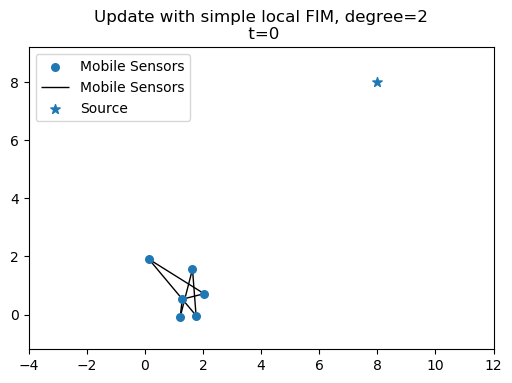

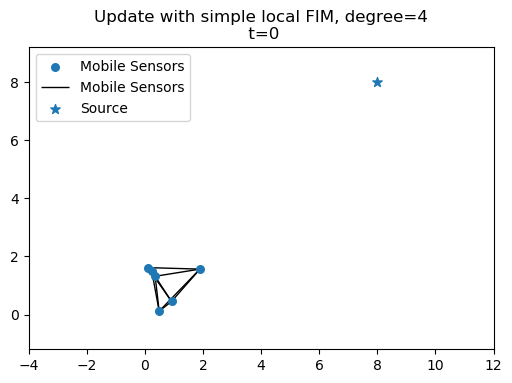

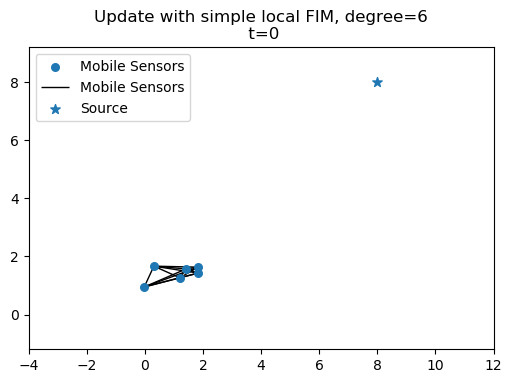

In [24]:
for in_deg in [1,2,3]:
    expr= "P2P-U{}".format(in_deg)
    filepath = "{}.pkl".format(expr)
    with open(filepath,'rb') as file:
        record = pkl.load(file)
    title=r"Update with simple local FIM, degree={}".format(2*in_deg)
    ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])
    qs = record['src_locs']['source_1']
    N_iter = ps.shape[1]

    fig, ax = plt.subplots(dpi=100)
    def plot_single_frame(j):
        ax.cla()
        G = record['comm_network'][j]
        nx.draw(G,pos=ps[:,j,:],ax=ax,label='Mobile Sensors',node_size=30) # ps.shape=(n_sensors,N_iter,space_dim)
        ax.scatter(qs[j,0],qs[j,1],marker='*',s=50,label='Source')
        ax.axis('on')
        ax.axis('equal')
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        ax.set_xlim((-4,12))
        ax.set_ylim((-4,12))
        ax.legend()
        ax.set_title(title+"\n t={}".format(j))
        plt.show()


    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_single_frame,
                                   frames=N_iter,interval=100)
    anim.save('{}.mp4'.format(expr))

## Animate directed graph experiment

In [107]:
in_deg = 5
expr= "P2P-D{}".format(in_deg)
filepath = "{}.pkl".format(expr)
with open(filepath,'rb') as file:
    record = pkl.load(file)

In [108]:
record.keys()

dict_keys(['est_locs_log', 'sensor_locs', 'src_locs', 'virtual_leader_locs', 'comm_network'])

In [109]:
record['comm_network'][0].edges

OutEdgeView([(1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4)])

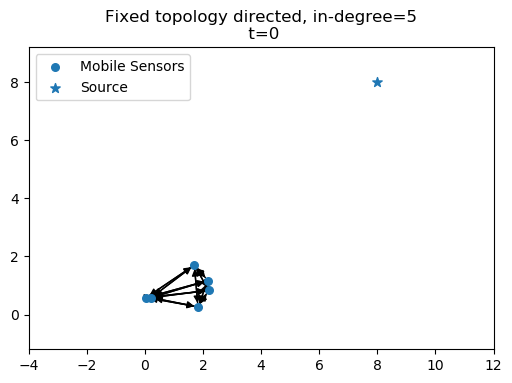

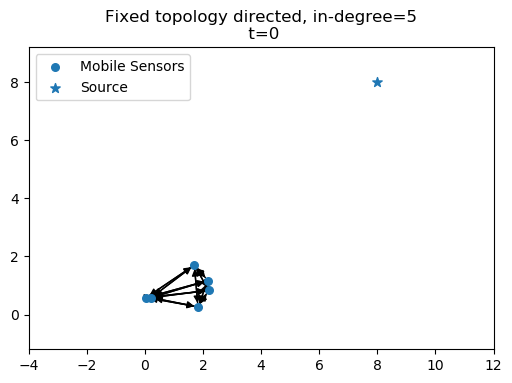

In [110]:
title=r"Fixed topology directed, in-degree={}".format(in_deg)
ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])
qs = record['src_locs']['source_1']
N_iter = ps.shape[1]

fig, ax = plt.subplots(dpi=100)
def plot_single_frame(j):
    ax.cla()
    G = record['comm_network'][j]
    nx.draw(G,pos=ps[:,j,:],ax=ax,label='Mobile Sensors',node_size=30) # ps.shape=(n_sensors,N_iter,space_dim)
    ax.scatter(qs[j,0],qs[j,1],marker='*',s=50,label='Source')
    ax.axis('on')
    ax.axis('equal')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_xlim((-4,12))
    ax.set_ylim((-4,12))
    ax.legend()
    ax.set_title(title+"\n t={}".format(j))
    plt.show()
    

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, plot_single_frame,
                               frames=N_iter,interval=100)


# Display

## Degree = 2

In [101]:
HTML(anim.to_html5_video())

In [106]:
HTML(anim.to_html5_video())

## Degree = 4

In [96]:
HTML(anim.to_html5_video())

In [90]:
HTML(anim.to_html5_video())

## Fully Connected

In [111]:
HTML(anim.to_html5_video())

In [116]:
HTML(anim.to_html5_video())